# Instala dependências

In [11]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Import

In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

# Config matplot
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Carrega CSV

In [13]:
df_seguros = pd.read_csv("insurance.csv", low_memory=False)

# Conhecendo os dados

In [14]:
# O shape nos mostra a quantidade de linhas e colunas do DataFrame
df_seguros.shape

(1338, 7)

Temos 1.3k de linhas em 7 colunas

In [15]:
# O método info() nos mostra informações sobre o DataFrame como quantidade de linhas, colunas, tipos de variáveis e quantidade de valores não nulos
df_seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Analisando o `info()`, vemos que temos algumas variáveis categóricas que precisamos converter, mas `não` temos valores nulos

In [16]:
# Verifica quais categorias temos para cada variável categórica
print(set(df_seguros['sex']))
print(set(df_seguros['smoker']))
print(set(df_seguros['region']))

{'male', 'female'}
{'no', 'yes'}
{'northeast', 'northwest', 'southeast', 'southwest'}


In [17]:
# Analisando informações básicas sobre nosso dataframe como tipos de variáveis, tamanho, amostra estatísticas básicas e etc (para numéricos somente)...
df_seguros.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
# Amostra dos dados
df_seguros.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

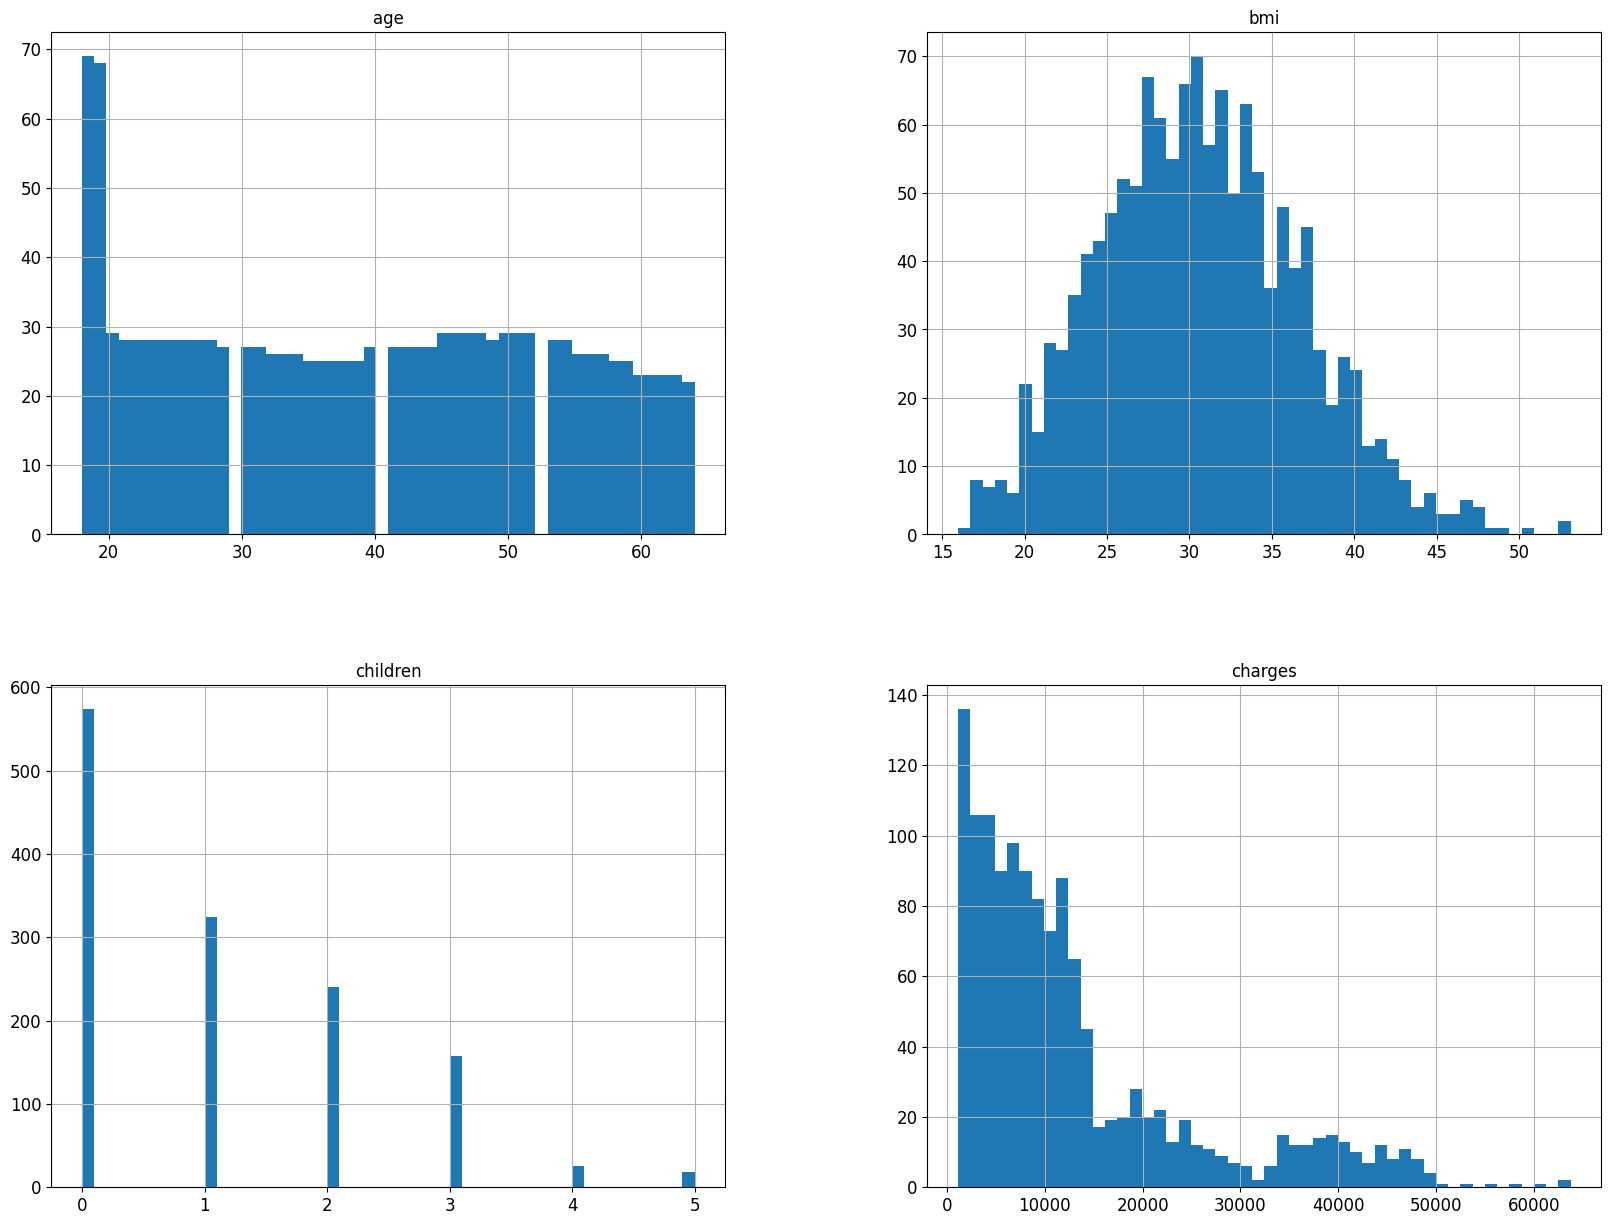

In [19]:
df_seguros.hist(bins=50, figsize=(20,15))

Insights:

- Idade: Distribuição aparentemente normal com um pico abaixo dos 20 anos
- IMC(bmi): Apresenta uma distribuição aproximadamente normal centrada em torno de 30. Poucos valores para >48~ anos
- Filhos: Mostra maioria não tem filho. Médio de ~1 filho. Poucos valores para 4 ou 5 filhos.
- Encargos: Maioria dos charges abaixo de ~15k. Interessante notar que temos poucos valores entre 50k~60k

# Pré-processamento de dados

In [20]:
# Função para aplicar o LabelEncoder
def create_cat_pipeline(columns):
    # Função para aplicar o LabelEncoder
    def apply_label_encoder(df):
        le = LabelEncoder()
        for col in df.columns:
            if df[col].dtype == 'object':  # Se a coluna for categórica
                df[col] = le.fit_transform(df[col])
            else:  # Se a coluna já for numérica
                df[col] = df[col]
        return df

    # Criando um transformador de função para a função apply_label_encoder
    label_encoder_transformer = FunctionTransformer(apply_label_encoder)

    # Criando a pipeline
    pipeline = make_column_transformer(
        (label_encoder_transformer, columns)
    )

    return pipeline


# Definindo as colunas que você deseja processar
columns_to_process = df_seguros.columns

# Criando a pipeline
cat_pipeline = create_cat_pipeline(columns_to_process)

# Aplicando a pipeline ao DataFrame
df_seguros_transformed = cat_pipeline.fit_transform(df_seguros)

df_seguros_transformed = pd.DataFrame(df_seguros_transformed, columns=df_seguros.columns)

df_seguros_transformed.head(), df_seguros_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(7)
memory usage: 73.3 KB


(    age  sex     bmi  children  smoker  region      charges
 0  19.0  0.0  27.900       0.0     1.0     3.0  16884.92400
 1  18.0  1.0  33.770       1.0     0.0     2.0   1725.55230
 2  28.0  1.0  33.000       3.0     0.0     2.0   4449.46200
 3  33.0  1.0  22.705       0.0     0.0     1.0  21984.47061
 4  32.0  1.0  28.880       0.0     0.0     1.0   3866.85520,
 None)

🙂 categóricas convertidas

# Correlação


Matriz de correlação
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


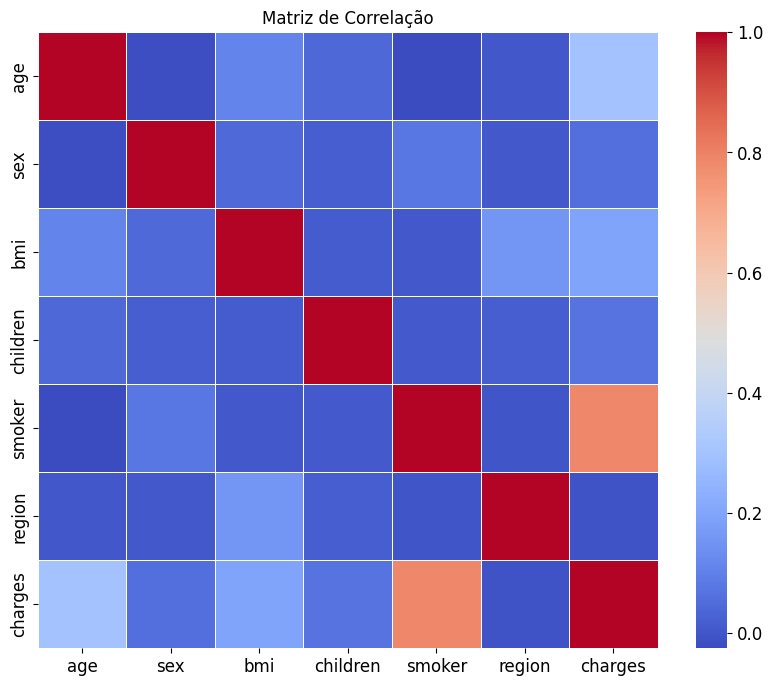

In [21]:
# Criando dataframe com nossas variáveis numericas
df_seguros_numerico = df_seguros_transformed.select_dtypes([np.number])
# Calcula a matriz de correlação
correlation_matrix = df_seguros_numerico.corr()
print("\nMatriz de correlação")
print(correlation_matrix)

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

### Insights

Aparentemente ser fumante tem uma correlaçao maior. IMC e Idade também são interessante.

# Separando os dados

In [22]:
X = df_seguros_transformed.drop(columns=['charges'])  # Variáveis características
y = df_seguros_transformed['charges']  # O que eu quero prever. (Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimindo o número de instâncias nos conjuntos de treinamento e teste
print("\nNúmero de instâncias nos conjuntos de treinamento e teste:")
print(len(X_train), "treinamento +", len(X_test), "teste")


Número de instâncias nos conjuntos de treinamento e teste:
1070 treinamento + 268 teste


# Treinando o modelo

Primeiro vamos começar treinando o modelo sem augmentation e avaliar

In [37]:
# Criando o modelo de DecisionTreeRegressor
# max_depth=10 é o parâmetro que define a profundidade máxima da árvore de decisão
model_dtr = LinearRegression()

# Treinando o modelo com os dados preparados e os rótulos
model_dtr.fit(X_train, y_train)

model_dtr

LinearRegression()

In [38]:
# Fazer previsões no conjunto de teste
y_pred = model_dtr.predict(X_test)

y_pred, y_test

(array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
        27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
         1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
         5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
        15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
         3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
        11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
         9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
         4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
         1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
         3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
         8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
        35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
        12397.52052544,  1433.90617387, 13448.14094304, 12519.54

# Medindo eficácia

In [43]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, y_pred)
erro_absoluto_medio = mean_absolute_error(y_test, y_pred)
r_quadrado = r2_score(y_test, y_pred)


"""
MSE (Mean Squared Error): Mede a média dos quadrados dos erros, ou seja, a média das diferenças quadráticas entre os valores reais e previstos. Valores menores indicam um melhor ajuste.
R² (R-squared): Representa a proporção da variabilidade total dos dados explicada pelo modelo. Valores próximos de 1 indicam um modelo com bom ajuste.
MAE (Mean Absolute Error): Mede a média dos erros absolutos, ou seja, a média das diferenças absolutas entre os valores reais e previstos. Valores menores indicam um melhor ajuste.
"""

print(f'Erro Médio Quadrático (MSE): {erro_medio_quadratico}')
print(f'Erro Absoluto Médio (MAE): {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

print("\nCoeficientes do modelo:")
print(pd.DataFrame(model_dtr.coef_, X.columns, columns=['Coeficiente']))

print("\nIntercepto do modelo:")
model_dtr.intercept_

Erro Médio Quadrático (MSE): 33635210.43117841
Erro Absoluto Médio (MAE): 4186.5088983664355
R² (coeficiente de determinação): 0.7833463107364538

Coeficientes do modelo:
           Coeficiente
age         257.056264
sex         -18.791457
bmi         335.781491
children    425.091456
smoker    23647.818096
region     -271.284266

Intercepto do modelo:


np.float64(-11946.60656726303)

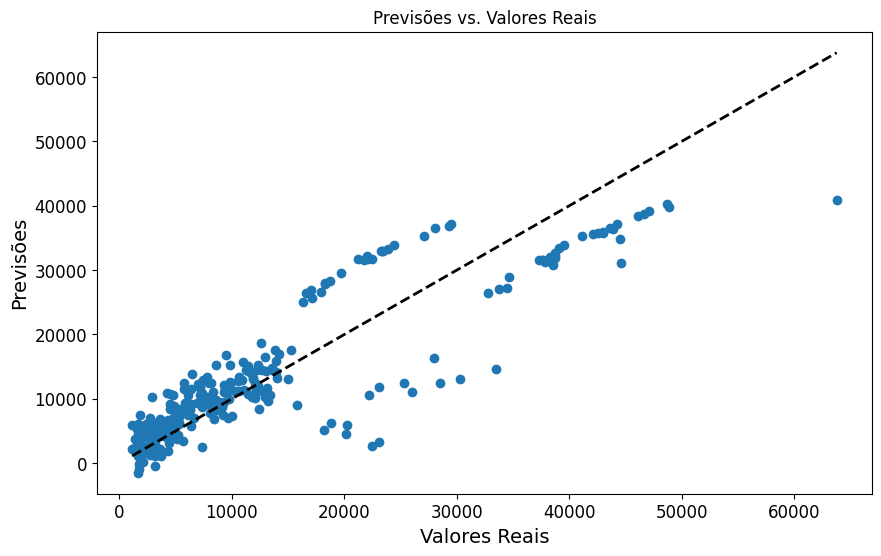

In [40]:
# Resultados visuais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.show()